<a href="https://colab.research.google.com/github/alekhyach34/minor_project/blob/main/OPFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Importing dataset
df = pd.read_csv('/content/drive/MyDrive/fraud_detection_dataset.csv')

In [ ]:
#Data Information
df.head(10)

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,175.11,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,4175618153978435573,06/30,777,42.103.253.55,Tablet,In-store,True
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,968.51,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,3513493835255325,09/24,632,156.41.109.8,Desktop,In-store,True
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,fergusonmatthew@example.net,622.59,2024-02-28,"Pearson, Cooper and Miller",hlewis@moss.net,Mayotte,30164341270757,01/33,102,167.20.56.146,Desktop,Online,False
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,williamsshirley@example.com,698.31,2024-01-27,Mcdaniel and Sons,brianchavez@stevens.net,Antigua and Barbuda,30345609968469,12/26,902,52.241.35.223,Desktop,In-store,False
4,b355f6c7-04b9-4b52-958d-cce13114aafe,Lisa Blankenship,bondmitchell@example.org,86.73,2024-01-13,Richard-Russo,sandra12@mccall.com,Tanzania,4162499529947049565,01/25,849,135.255.117.111,Mobile,Online,True
5,5e7632dc-9458-4945-bab6-307fbb932755,Richard Alvarado,michaelross@example.org,749.74,2024-02-02,"Wright, Cummings and Morales",hawkinslisa@smith.com,Cameroon,4177322811284073585,12/31,152,40.136.231.197,Desktop,In-store,False
6,1639156c-2399-4876-9386-eb1537f955ea,Jasmine Sanchez DDS,jenniferlopez@example.net,814.09,2024-02-17,Bruce Group,jennifer48@soto.com,Pakistan,213166315005969,03/29,612,178.178.167.27,Tablet,Online,True
7,8a378f64-dc81-4f6a-b757-44c4bd47e121,Paula King,nicholasgay@example.org,886.49,2024-02-28,Bishop Ltd,cdillon@ramirez.com,Slovenia,344685208589575,01/27,109,118.154.7.105,Desktop,In-store,True
8,ad38e0c8-faf9-4160-bc04-f95ac60c9ad1,Jamie Jefferson,ldavis@example.net,115.53,2024-02-09,Simon-Johnson,jacob42@levy.info,San Marino,4830632339277,05/25,643,13.78.40.239,Desktop,In-store,False
9,b004dc31-a7de-474d-a1b4-bf5ac6b8a026,Carolyn Nunez,ronald28@example.org,402.21,2024-02-22,"Jones, Nelson and Wallace",ayerskelly@stewart.com,Mozambique,3583708198947498,03/24,748,90.248.136.175,Desktop,In-store,False


In [ ]:
print("Shape of the datacolumn: ",df.shape)
df.isna().sum()

Shape of the datacolumn:  (2000, 15)


Transaction_ID        0
Customer_Name         0
Customer_Email        0
Transaction_Amount    0
Transaction_Date      0
Merchant_Name         0
Merchant_Email        0
Merchant_Location     0
Card_Number           0
Card_Expiry           0
Card_CVV              0
IP_Address            0
Device_Type           0
Transaction_Type      0
Fraudulent            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      2000 non-null   object 
 1   Customer_Name       2000 non-null   object 
 2   Customer_Email      2000 non-null   object 
 3   Transaction_Amount  2000 non-null   float64
 4   Transaction_Date    2000 non-null   object 
 5   Merchant_Name       2000 non-null   object 
 6   Merchant_Email      2000 non-null   object 
 7   Merchant_Location   2000 non-null   object 
 8   Card_Number         2000 non-null   int64  
 9   Card_Expiry         2000 non-null   object 
 10  Card_CVV            2000 non-null   int64  
 11  IP_Address          2000 non-null   object 
 12  Device_Type         2000 non-null   object 
 13  Transaction_Type    2000 non-null   object 
 14  Fraudulent          2000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usa

In [ ]:
df.describe()

,Transaction_Amount,Card_Number,Card_CVV
count,2000.000000,2.000000e+03,2000.000000
mean,511.617505,3.631431e+17,864.213500
std,285.349648,1.222210e+18,1466.888507
min,10.690000,6.040139e+10,0.000000
25%,268.380000,1.447474e+14,283.000000
50%,507.255000,3.511683e+15,558.000000
75%,760.177500,4.659852e+15,814.000000
max,999.590000,4.998951e+18,9895.000000


In [ ]:
df.dtypes

Transaction_ID         object
Customer_Name          object
Customer_Email         object
Transaction_Amount    float64
Transaction_Date       object
Merchant_Name          object
Merchant_Email         object
Merchant_Location      object
Card_Number             int64
Card_Expiry            object
Card_CVV                int64
IP_Address             object
Device_Type            object
Transaction_Type       object
Fraudulent               bool
dtype: object

In [ ]:
df.notnull().sum()

Transaction_ID        2000
Customer_Name         2000
Customer_Email        2000
Transaction_Amount    2000
Transaction_Date      2000
Merchant_Name         2000
Merchant_Email        2000
Merchant_Location     2000
Card_Number           2000
Card_Expiry           2000
Card_CVV              2000
IP_Address            2000
Device_Type           2000
Transaction_Type      2000
Fraudulent            2000
dtype: int64

In [ ]:
df['Fraudulent'].value_counts()

False    1003
True      997
Name: Fraudulent, dtype: int64

In [ ]:
df.shape

(2000, 15)

In [ ]:
df.size

30000

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
df.dropna()

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,175.11,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,4175618153978435573,06/30,777,42.103.253.55,Tablet,In-store,True
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,968.51,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,3513493835255325,09/24,632,156.41.109.8,Desktop,In-store,True
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,fergusonmatthew@example.net,622.59,2024-02-28,"Pearson, Cooper and Miller",hlewis@moss.net,Mayotte,30164341270757,01/33,102,167.20.56.146,Desktop,Online,False
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,williamsshirley@example.com,698.31,2024-01-27,Mcdaniel and Sons,brianchavez@stevens.net,Antigua and Barbuda,30345609968469,12/26,902,52.241.35.223,Desktop,In-store,False
4,b355f6c7-04b9-4b52-958d-cce13114aafe,Lisa Blankenship,bondmitchell@example.org,86.73,2024-01-13,Richard-Russo,sandra12@mccall.com,Tanzania,4162499529947049565,01/25,849,135.255.117.111,Mobile,Online,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,e58a1448-4bde-4edf-a27a-b9fbd5414a5a,April Perez,antoniolivingston@example.com,498.96,2024-03-05,"Roth, Robinson and Carter",moniquekim@rivera-williams.com,Guadeloupe,180064228574719,12/31,730,4.127.154.120,Mobile,Online,False
1996,9125cde2-5340-472a-8437-fd0e19c5ce53,Anthony Moore,riddlephillip@example.com,777.68,2024-02-25,Peters PLC,aguerra@rivera.com,Guernsey,675910401412,09/32,237,65.218.157.243,Desktop,In-store,True
1997,2a61aba3-9bd2-47c8-aa9e-13aa0b64fa13,Gail Hall,randylee@example.com,930.97,2024-02-21,Berry-Jones,cartersarah@cannon-bryan.info,Tonga,30277240393221,09/32,933,171.218.133.77,Mobile,In-store,True
1998,5ab7c2bd-0814-48de-8699-e2b8226509ec,Michael Baldwin,lindseywalton@example.org,250.43,2024-01-24,Swanson Inc,mariemccoy@bond.org,Bahrain,213130392749824,11/25,623,117.171.22.157,Mobile,Online,False


In [ ]:
df.columns

Index(['Transaction_ID', 'Customer_Name', 'Customer_Email',
       'Transaction_Amount', 'Transaction_Date', 'Merchant_Name',
       'Merchant_Email', 'Merchant_Location', 'Card_Number', 'Card_Expiry',
       'Card_CVV', 'IP_Address', 'Device_Type', 'Transaction_Type',
       'Fraudulent'],
      dtype='object')

In [ ]:
df.describe(include=object)

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Expiry,IP_Address,Device_Type,Transaction_Type
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1980,1993,65,1900,2000,243,121,2000,3,2
top,2c276e09-24f7-4e6b-8122-47c3627a7268,David Rodriguez,josephsmith@example.net,2024-01-23,Smith PLC,gregcaldwell@gillespie.net,Korea,05/25,42.103.253.55,Tablet,Online
freq,1,4,2,40,6,1,21,28,1,694,1003


In [ ]:
# Get the distinct values of each column
for column in df.columns:
    unique_val=df[column].unique()
    print("unique values of {} are {}".format(column,unique_val))

unique values of Transaction_ID are ['2c276e09-24f7-4e6b-8122-47c3627a7268'
 'dc066519-15d4-45a6-9e6d-5333c0a55fbc'
 '64d731f5-cd6f-4d7d-9a06-1c924f3cc26b' ...
 '2a61aba3-9bd2-47c8-aa9e-13aa0b64fa13'
 '5ab7c2bd-0814-48de-8699-e2b8226509ec'
 '946a8430-1c15-4185-8834-c11c16fad590']
unique values of Customer_Name are ['Jennifer Wilson' 'Scott Matthews' 'Melanie Franklin' ... 'Gail Hall'
 'Michael Baldwin' 'Jennifer Lawson']
unique values of Customer_Email are ['amygreen@example.com' 'nicoleferguson@example.net'
 'fergusonmatthew@example.net' ... 'randylee@example.com'
 'lindseywalton@example.org' 'carlospatel@example.org']
unique values of Transaction_Amount are [175.11 968.51 622.59 ... 930.97 250.43 403.77]
unique values of Transaction_Date are ['2024-03-01' '2024-02-23' '2024-02-28' '2024-01-27' '2024-01-13'
 '2024-02-02' '2024-02-17' '2024-02-09' '2024-02-22' '2024-01-23'
 '2024-03-02' '2024-02-10' '2024-02-24' '2024-02-07' '2024-01-12'
 '2024-01-08' '2024-02-08' '2024-01-16' '2024-01

In [ ]:
#Filtering rows based on the presence of null values using the dropna() method:
filtered_dropna = df.dropna(axis=0) # default axis value is zero ==> rows with missing values are deleted
print("Total records Before:" , df.shape)
print("Total records After:" , filtered_dropna.shape)

Total records Before: (2000, 15)
Total records After: (2000, 15)


In [ ]:
#Filtering rows based on the presence of null values using the dropna() method:

filtered_dropna_2 = df.dropna(axis=1) # ==> columns with missing values are deleted

print("Total records Before:" , df.shape)
print("Total records After:" , filtered_dropna_2.shape)

Total records Before: (2000, 15)
Total records After: (2000, 15)


In [ ]:
dup_test = df[df.duplicated()]
dup_test.shape

(0, 15)

In [ ]:
# Filter rows based on condition'Transaction_Amount' >= 800
filtered_Transaction_Amount = df[df['Transaction_Amount'] >=800 ]
print("Total records:", len(filtered_Transaction_Amount))
filtered_Transaction_Amount.head()

Total records: 415


,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,968.51,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,3513493835255325,09/24,632,156.41.109.8,Desktop,In-store,True
6,1639156c-2399-4876-9386-eb1537f955ea,Jasmine Sanchez DDS,jenniferlopez@example.net,814.09,2024-02-17,Bruce Group,jennifer48@soto.com,Pakistan,213166315005969,03/29,612,178.178.167.27,Tablet,Online,True
7,8a378f64-dc81-4f6a-b757-44c4bd47e121,Paula King,nicholasgay@example.org,886.49,2024-02-28,Bishop Ltd,cdillon@ramirez.com,Slovenia,344685208589575,01/27,109,118.154.7.105,Desktop,In-store,True
10,564e3489-2f29-4328-865a-9c0b6b3e44c0,Brian Pittman,julieedwards@example.net,916.13,2024-01-23,Sims PLC,ashley05@richards.net,Yemen,6011993569181704,11/29,680,51.203.194.64,Desktop,In-store,True
14,600f28da-af4f-41cc-a106-60d977f2136f,Kristin Rivers,thomasmichael@example.org,993.97,2024-03-01,Gibson-Howe,stevensanchez@brown-townsend.com,Nauru,30506741104327,09/25,563,159.32.16.56,Mobile,Online,True


In [ ]:
# Filter rows where 'Customer_Name' startswith 'J'
name_inc=df[df["Customer_Name"].str.startswith("J")]
name_inc

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,175.11,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,4175618153978435573,06/30,777,42.103.253.55,Tablet,In-store,True
6,1639156c-2399-4876-9386-eb1537f955ea,Jasmine Sanchez DDS,jenniferlopez@example.net,814.09,2024-02-17,Bruce Group,jennifer48@soto.com,Pakistan,213166315005969,03/29,612,178.178.167.27,Tablet,Online,True
8,ad38e0c8-faf9-4160-bc04-f95ac60c9ad1,Jamie Jefferson,ldavis@example.net,115.53,2024-02-09,Simon-Johnson,jacob42@levy.info,San Marino,4830632339277,05/25,643,13.78.40.239,Desktop,In-store,False
12,711329c3-e702-4e12-a481-90dbb0492a13,Justin Thomas,kaylawarren@example.com,593.64,2024-03-01,Anderson-Brooks,joshua63@collins.com,China,6011074089187420,12/30,578,106.60.167.175,Tablet,Online,False
18,5fe51058-bb9a-4eb8-aca7-3364217cd91a,James Diaz,howebrian@example.com,542.20,2024-01-08,"Rojas, Dickerson and Martin",pierceandrea@wilson.com,Taiwan,6500259070232842,04/32,2778,144.9.207.125,Tablet,Online,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,4028f42d-af43-426b-a105-da334f778b28,James Boone,smithcrystal@example.org,667.96,2024-02-11,"Huang, Clark and Lopez",mark39@li.com,Brazil,4257039847845569327,10/31,922,9.196.107.180,Mobile,In-store,True
1976,3a9e4091-12f7-4eba-a52d-90b3206a3c37,John Williams,chandlermariah@example.net,475.45,2024-02-21,Davis-Bartlett,lopezbrandon@thomas.info,Australia,370689224786832,03/25,49,124.97.173.102,Tablet,In-store,True
1983,26c39b9b-a84b-487e-85ca-8b1f42511808,Jennifer Mendez,hillgregory@example.net,131.64,2024-01-02,Alexander-Dixon,bakersusan@reed.info,New Zealand,3519995472910628,06/33,148,94.100.6.72,Mobile,Online,False
1990,3ea6ae45-cbc0-4050-82e4-8c7e92f11ac5,Jeffery Barrera,yfarley@example.org,128.16,2024-02-19,"Buchanan, Green and Collins",loganmary@thomas.biz,Japan,3589341802894114,04/27,1858,203.182.43.131,Tablet,In-store,True


In [ ]:
#all columns
cols3=df.loc[0:6, :]
cols3

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,175.11,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,4175618153978435573,06/30,777,42.103.253.55,Tablet,In-store,True
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,968.51,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,3513493835255325,09/24,632,156.41.109.8,Desktop,In-store,True
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,fergusonmatthew@example.net,622.59,2024-02-28,"Pearson, Cooper and Miller",hlewis@moss.net,Mayotte,30164341270757,01/33,102,167.20.56.146,Desktop,Online,False
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,williamsshirley@example.com,698.31,2024-01-27,Mcdaniel and Sons,brianchavez@stevens.net,Antigua and Barbuda,30345609968469,12/26,902,52.241.35.223,Desktop,In-store,False
4,b355f6c7-04b9-4b52-958d-cce13114aafe,Lisa Blankenship,bondmitchell@example.org,86.73,2024-01-13,Richard-Russo,sandra12@mccall.com,Tanzania,4162499529947049565,01/25,849,135.255.117.111,Mobile,Online,True
5,5e7632dc-9458-4945-bab6-307fbb932755,Richard Alvarado,michaelross@example.org,749.74,2024-02-02,"Wright, Cummings and Morales",hawkinslisa@smith.com,Cameroon,4177322811284073585,12/31,152,40.136.231.197,Desktop,In-store,False
6,1639156c-2399-4876-9386-eb1537f955ea,Jasmine Sanchez DDS,jenniferlopez@example.net,814.09,2024-02-17,Bruce Group,jennifer48@soto.com,Pakistan,213166315005969,03/29,612,178.178.167.27,Tablet,Online,True


In [ ]:
# Filering specific columns

subset_data = df[['Transaction_ID', 'Customer_Name', 'Transaction_Amount', 'Transaction_Type']]
subset_data

,Transaction_ID,Customer_Name,Transaction_Amount,Transaction_Type
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,175.11,In-store
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,968.51,In-store
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,622.59,Online
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,698.31,In-store
4,b355f6c7-04b9-4b52-958d-cce13114aafe,Lisa Blankenship,86.73,Online
...,...,...,...,...
1995,e58a1448-4bde-4edf-a27a-b9fbd5414a5a,April Perez,498.96,Online
1996,9125cde2-5340-472a-8437-fd0e19c5ce53,Anthony Moore,777.68,In-store
1997,2a61aba3-9bd2-47c8-aa9e-13aa0b64fa13,Gail Hall,930.97,In-store
1998,5ab7c2bd-0814-48de-8699-e2b8226509ec,Michael Baldwin,250.43,Online


In [ ]:
# Accessing specific rows and columns using iloc
# Select the first three rows and the first two columns
rows_and_cols=df.iloc[0:3,0:2]
rows_and_cols

,Transaction_ID,Customer_Name
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin


In [ ]:
#unique Card_CVV
df["Card_CVV"]

0       777
1       632
2       102
3       902
4       849
       ... 
1995    730
1996    237
1997    933
1998    623
1999    197
Name: Card_CVV, Length: 2000, dtype: int64

In [ ]:
unique_Card_CVV=df[~df["Card_CVV"].duplicated()].loc[:,["Card_CVV"]]

In [ ]:
unique_Card_CVV

,Card_CVV
0,777
1,632
2,102
3,902
4,849
...,...
1987,453
1988,86
1990,1858
1993,637


In [ ]:
#top 10 Transaction_Amount values
temp=df[df["Transaction_Amount"].rank(ascending=False)<=10].loc[:,'Transaction_ID':'Transaction_Date']
temp

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date
294,ec5303e2-7218-4d90-ba12-6b9e27ca4e0f,Jennifer Hendrix,reginald15@example.org,999.10,2024-02-02
536,ef3a9c63-4962-4c52-ba7f-e415a0d10eee,Jason Powell,douglas91@example.net,997.85,2024-01-11
809,cf1ecb98-4f45-4b14-a66e-623ec926b172,Eileen Ford,michelemacdonald@example.org,996.70,2024-01-10
898,8834873b-8b27-45ec-86fd-fe95b2080c16,Christine Choi,benjamin01@example.net,998.25,2024-02-04
1215,06d0e016-1f37-4d79-9a8a-0c50f5c21503,Vicki Wright PhD,ipage@example.com,999.14,2024-02-20
1299,16db9d2b-b1cc-4fde-8c24-fb1f5eacb6e1,Jeffrey Pham,michaelriley@example.net,996.86,2024-03-02
1445,2d0d2662-c9a7-40c7-89af-733f11a0908d,Linda Mcguire,lisatate@example.org,998.74,2024-01-02
1679,a370a9f5-8e04-47b2-8ac8-7bd81aed1695,Crystal Graham,coxtimothy@example.com,997.58,2024-02-14
1770,e294ef58-016a-4067-8060-43f15f6a37bc,Paul Wallace,julie44@example.org,999.59,2024-01-22
1817,efee113b-bd90-41af-b8e8-4a34792024ae,Richard May,dwaynejones@example.net,997.72,2024-01-25


In [ ]:
filterd_num=df.select_dtypes(include='int').iloc[0:5,:]
filterd_num

,Card_Number,Card_CVV
0,4175618153978435573,777
1,3513493835255325,632
2,30164341270757,102
3,30345609968469,902
4,4162499529947049565,849


In [ ]:
filterd_num=df.select_dtypes(include='number').iloc[0:5,:]
filterd_num

,Transaction_Amount,Card_Number,Card_CVV
0,175.11,4175618153978435573,777
1,968.51,3513493835255325,632
2,622.59,30164341270757,102
3,698.31,30345609968469,902
4,86.73,4162499529947049565,849


In [ ]:
filterd_obj=df.select_dtypes(include='object').iloc[0:4,:]
filterd_obj

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Expiry,IP_Address,Device_Type,Transaction_Type
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,06/30,42.103.253.55,Tablet,In-store
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,09/24,156.41.109.8,Desktop,In-store
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,fergusonmatthew@example.net,2024-02-28,"Pearson, Cooper and Miller",hlewis@moss.net,Mayotte,01/33,167.20.56.146,Desktop,Online
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,williamsshirley@example.com,2024-01-27,Mcdaniel and Sons,brianchavez@stevens.net,Antigua and Barbuda,12/26,52.241.35.223,Desktop,In-store


In [ ]:
filterd_obj=df.select_dtypes(include='float').iloc[0:4,:]
filterd_obj

,Transaction_Amount
0,175.11
1,968.51
2,622.59
3,698.31


In [ ]:
# Create new variable : Transaction using Transaction_Amount
df["Transaction"]=-round(df['Transaction_Amount']+25,0)
df.head()

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent,Transaction
0,2c276e09-24f7-4e6b-8122-47c3627a7268,Jennifer Wilson,amygreen@example.com,175.11,2024-03-01,Hampton-Powell,gregcaldwell@gillespie.net,Cayman Islands,4175618153978435573,06/30,777,42.103.253.55,Tablet,In-store,True,-200.0
1,dc066519-15d4-45a6-9e6d-5333c0a55fbc,Scott Matthews,nicoleferguson@example.net,968.51,2024-02-23,Keller and Sons,deniseramsey@gallegos-hubbard.com,Zimbabwe,3513493835255325,09/24,632,156.41.109.8,Desktop,In-store,True,-994.0
2,64d731f5-cd6f-4d7d-9a06-1c924f3cc26b,Melanie Franklin,fergusonmatthew@example.net,622.59,2024-02-28,"Pearson, Cooper and Miller",hlewis@moss.net,Mayotte,30164341270757,01/33,102,167.20.56.146,Desktop,Online,False,-648.0
3,d65e7862-b30c-4df9-b44e-fd219c2429cb,Sabrina Waller,williamsshirley@example.com,698.31,2024-01-27,Mcdaniel and Sons,brianchavez@stevens.net,Antigua and Barbuda,30345609968469,12/26,902,52.241.35.223,Desktop,In-store,False,-723.0
4,b355f6c7-04b9-4b52-958d-cce13114aafe,Lisa Blankenship,bondmitchell@example.org,86.73,2024-01-13,Richard-Russo,sandra12@mccall.com,Tanzania,4162499529947049565,01/25,849,135.255.117.111,Mobile,Online,True,-112.0


In [ ]:
#now delete Nincolumn
df.drop('Transaction', axis=1,inplace=True)

In [ ]:
df=df.dropna(axis=0)
print(df.shape)

(2000, 15)


**EDA-Exploratory data analysis**

<Axes: xlabel='Transaction_Type', ylabel='count'>

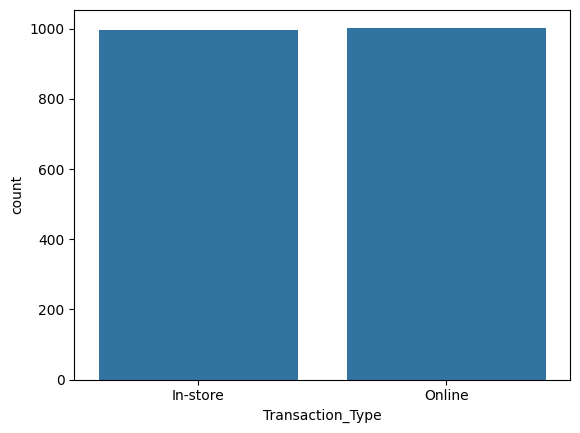

In [ ]:
sns.countplot(x='Transaction_Type', data=df)

<Axes: xlabel='Device_Type', ylabel='count'>

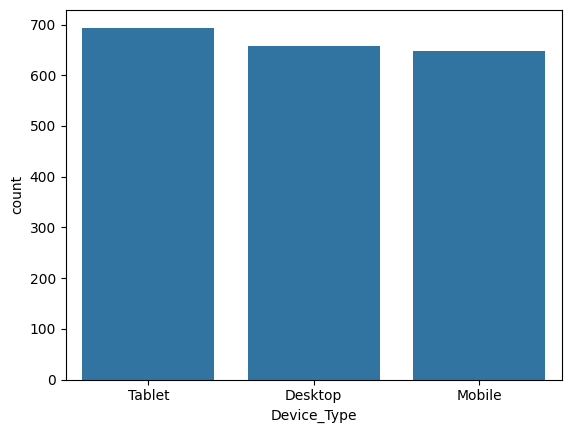

In [ ]:
sns.countplot(x='Device_Type', data=df)

<Axes: xlabel='Fraudulent', ylabel='count'>

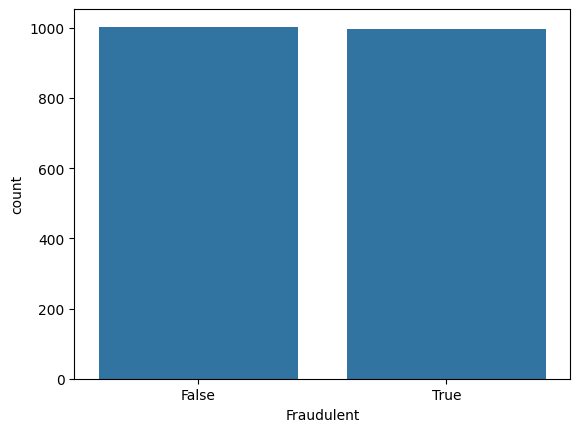

In [ ]:
sns.countplot(x='Fraudulent', data=df)